<a href="https://colab.research.google.com/github/gladstan/DBT-Data-Build-Tool-Projects/blob/sample_dbt/Multilinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [24]:
!pip install pandas

In [5]:
!pip install scikit-learn

In [25]:
csv = pd.read_csv('House Price India.csv')
data = csv[['id','Date','number of bathrooms',
            'living area', 'number of floors','Built Year','Postal Code',
            'Number of schools nearby','Distance from the airport','Price']]

data.head(5)

,id,Date,number of bathrooms,living area,number of floors,Built Year,Postal Code,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,2.50,3650,2.0,1921,122003,2,58,2380000
1,6762810635,42491,2.50,2920,1.5,1909,122004,2,51,1400000
2,6762810998,42491,2.75,2910,1.5,1939,122004,1,53,1200000
3,6762812605,42491,2.50,3310,2.0,2001,122005,3,76,838000
4,6762812919,42491,2.00,2710,1.5,1929,122006,1,51,805000


In [26]:
#check the missing values

val = data.isna().sum()
print(val)

id                           0
Date                         0
number of bathrooms          0
living area                  0
number of floors             0
Built Year                   0
Postal Code                  0
Number of schools nearby     0
Distance from the airport    0
Price                        0
dtype: int64


In [27]:
data.describe()

,id,Date,number of bathrooms,living area,number of floors,Built Year,Postal Code,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,2.129583,2098.262996,1.502360,1970.926402,122033.062244,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.769934,928.275721,0.540239,29.493625,19.082418,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,0.500000,370.000000,1.000000,1900.000000,122003.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,1.750000,1440.000000,1.000000,1951.000000,122017.000000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,2.250000,1930.000000,1.500000,1975.000000,122032.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,2.500000,2570.000000,2.000000,1997.000000,122048.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,8.000000,13540.000000,3.500000,2015.000000,122072.000000,3.000000,80.000000,7.700000e+06


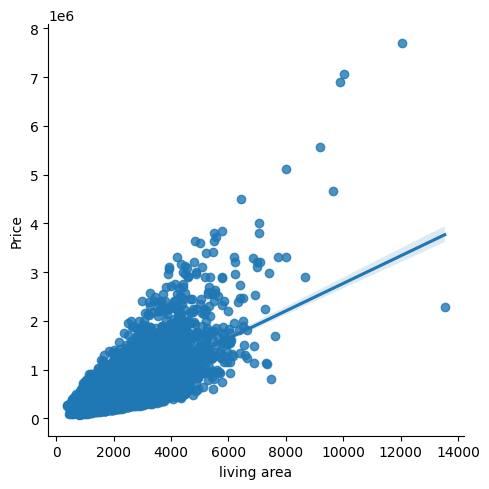

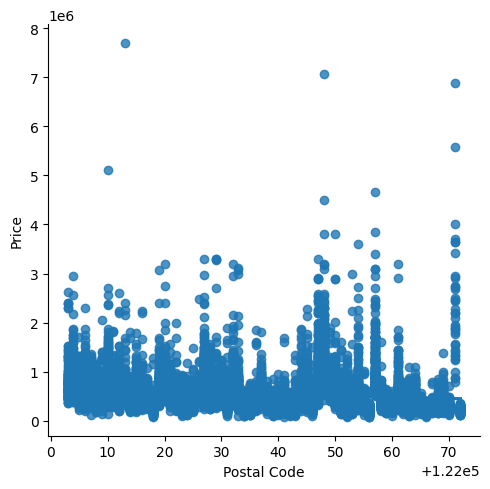

In [28]:
# Barplot

chart = sns.lmplot(x='living area',y='Price',data=data)

chart = sns.lmplot(x='Postal Code',y='Price',data=data)

plt.show()
plt.show()

In [29]:
dt = data.sort_values(by='Postal Code',ascending =True)
dt.head(10)

,id,Date,number of bathrooms,living area,number of floors,Built Year,Postal Code,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,2.50,3650,2.0,1921,122003,2,58,2380000
13811,6762816707,42714,2.50,2160,3.0,2010,122003,2,74,585000
3402,6762814673,42544,1.50,1820,1.5,1946,122003,1,55,683500
13103,6762812076,42699,1.50,2160,2.0,1917,122003,2,78,900000
10447,6762816960,42652,2.75,1710,1.0,1909,122003,3,55,575000
1016,6762813553,42509,2.00,2150,1.0,1952,122003,2,54,755000
2436,6762812969,42531,3.75,2690,2.0,1909,122003,3,68,800000
1526,6762812562,42517,2.00,2520,1.5,1906,122003,1,62,840500
1044,6762819469,42509,3.50,4460,3.0,2015,122003,1,59,490000
10581,6762813638,42656,1.75,2100,1.0,1915,122003,2,79,750000


In [46]:
# area = data['living area'].values.reshape(-1,1)
x = data[['living area','number of bathrooms','number of floors','Built Year','Number of schools nearby','Postal Code','Distance from the airport']]
y=data['Price']
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [32]:
val= reg.predict([[2160,2.50,3.0,2010,2,74]])
print(val)

[544311.95799129]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# mean absolute error
true_price = 585000
mean = mean_absolute_error([true_price],[val])

print(mean)

40688.042008710094


In [40]:
# value = x['living area']

#correleation coefficient
are = x['living area']
check = np.corrcoef(are,y)[0,1]
print(check)

0.7121694766782514


In [47]:
code = x['Postal Code']
axis = np.corrcoef(code,y)[0,1]
print(axis)

-0.11590816987158212
